In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *

# Sklearn processing
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.compose import *

# Sklearn regression algorithms
from sklearn.linear_model import *

# Sklearn regression model evaluation functions
from sklearn.metrics import *

In [2]:
data = pd.read_csv("building-energy-cleaned.csv")

In [3]:
import os.path, time
print("Dernière modification: %s" % time.ctime(os.path.getmtime("building-energy-cleaned.csv")))

Dernière modification: Tue Aug  9 22:00:00 2022


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OSEBuildingID           1548 non-null   int64  
 1   BuildingType            1548 non-null   object 
 2   PrimaryPropertyType     1548 non-null   object 
 3   Neighborhood            1548 non-null   object 
 4   NumberofBuildings       1548 non-null   float64
 5   NumberofFloors          1548 non-null   int64  
 6   PropertyGFAParking      1548 non-null   int64  
 7   PropertyGFABuilding(s)  1548 non-null   int64  
 8   LargestPropertyUseType  1548 non-null   object 
 9   ENERGYSTARScore         997 non-null    float64
 10  SiteEnergyUse(kBtu)     1548 non-null   float64
 11  TotalGHGEmissions       1548 non-null   float64
 12  BuildingAge             1548 non-null   int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 157.3+ KB


In [5]:
data.describe()

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge
count,1548.000000,1548.000000,1548.000000,1548.000000,1.548000e+03,997.000000,1.548000e+03,1548.000000,1548.000000
mean,16497.944444,1.212532,4.286822,13842.337209,1.074898e+05,63.635908,8.860058e+06,193.609426,54.355943
std,13827.877766,3.031517,6.774923,43721.822291,2.926272e+05,28.825309,3.130568e+07,779.105149,32.886918
min,1.000000,1.000000,1.000000,0.000000,3.636000e+03,1.000000,5.713320e+04,0.001000,1.000000
25%,602.750000,1.000000,1.000000,0.000000,2.793675e+04,44.000000,1.251083e+06,20.655000,27.000000
50%,21180.500000,1.000000,2.000000,0.000000,4.608400e+04,71.000000,2.732167e+06,49.845000,50.500000
75%,24609.000000,1.000000,4.000000,0.000000,9.556825e+04,88.000000,7.294487e+06,147.227500,86.000000
max,50226.000000,111.000000,99.000000,512608.000000,9.320156e+06,100.000000,8.739237e+08,16870.980000,116.000000


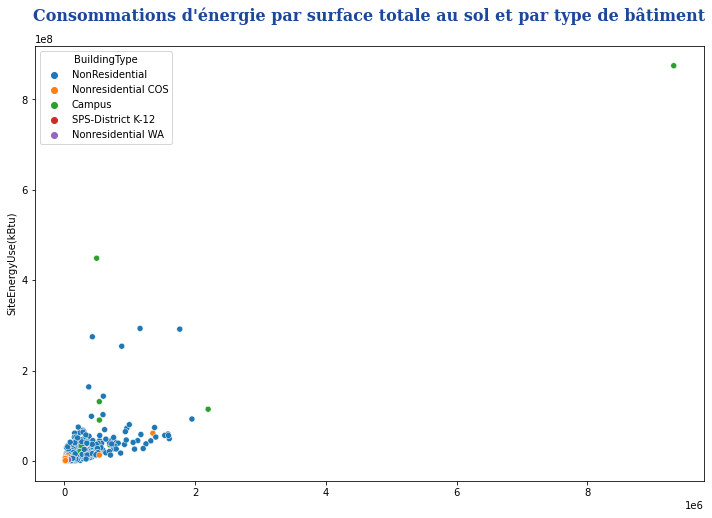

In [6]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x=data['PropertyGFAParking']+data['PropertyGFABuilding(s)'], y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.show()

In [7]:
data[data['SiteEnergyUse(kBtu)']>8*10**8]

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge
1510,49967,Campus,University,NORTHEAST,111.0,1,0,9320156,College/University,NaN,873923712.0,11140.56,116


In [8]:
data = data[data['SiteEnergyUse(kBtu)']<8*10**8]

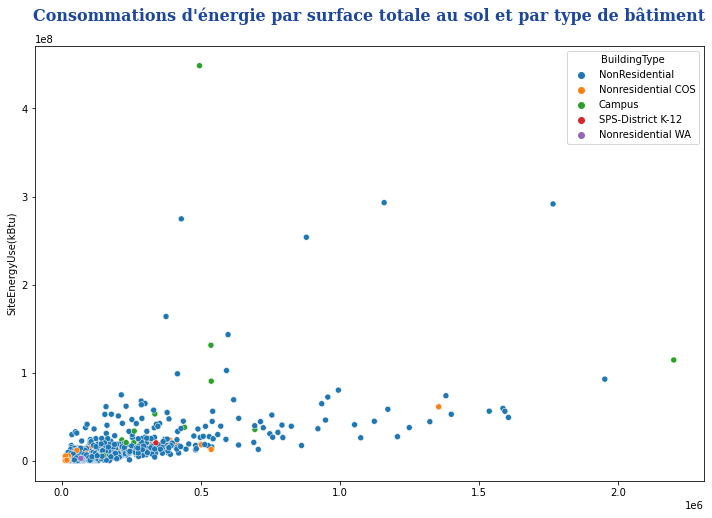

In [9]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x=data['PropertyGFAParking']+data['PropertyGFABuilding(s)'], y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.show()

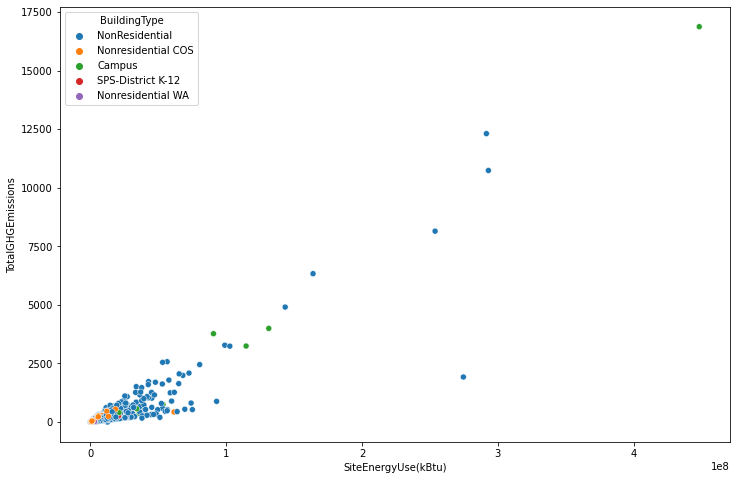

In [10]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x = 'SiteEnergyUse(kBtu)', y = 'TotalGHGEmissions', hue='BuildingType')
plt.show()

In [11]:
identification_features = ['OSEBuildingID']
data_identification = data[identification_features]
data.drop(identification_features, axis=1, inplace = True)

1.1. Encodage et standardisation

Nous allons séparer les données numériques et les données catégorielles de notre dataset :

In [12]:
numerical_features = data.select_dtypes(include=['int64','float64'])
categorical_features = data.select_dtypes(exclude=['int64','float64'])

In [13]:
categorical_features.nunique()

BuildingType               5
PrimaryPropertyType       21
Neighborhood              13
LargestPropertyUseType    55
dtype: int64

In [14]:
list(numerical_features.columns)

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'BuildingAge']

ENERGYSTARScore est insuffisamment complété. Nous allons l'écarter du dataset mais nous la conservons pour vérifier ensuite si cette variable a un impact sur la qualité de prédiction.

In [15]:
energystar_score = numerical_features['ENERGYSTARScore']
numerical_features = numerical_features.drop(['ENERGYSTARScore'], axis=1)

In [16]:
data_filter = pd.concat([categorical_features, numerical_features], axis=1)

In [17]:
data_filter.head()

,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge
0,NonResidential,Hotel,DOWNTOWN,Hotel,1.0,12,0,88434,7226362.5,249.98,89
1,NonResidential,Hotel,DOWNTOWN,Hotel,1.0,11,15064,88502,8387933.0,295.86,20
2,NonResidential,Hotel,DOWNTOWN,Hotel,1.0,41,196718,759392,72587024.0,2089.28,47
3,NonResidential,Hotel,DOWNTOWN,Hotel,1.0,10,0,61320,6794584.0,286.43,90
4,NonResidential,Hotel,DOWNTOWN,Hotel,1.0,18,62000,113580,14172606.0,505.01,36


Préparation du Preprocessor

In [18]:
cat_features = ['BuildingType','PrimaryPropertyType','Neighborhood', 'LargestPropertyUseType']
cat_transformer = OneHotEncoder(handle_unknown='ignore')

numeric_features = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
                     'PropertyGFABuilding(s)', 'BuildingAge']
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_features),
    ('numeric', numeric_transformer, numeric_features)
])

In [19]:
import warnings
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
        
    ------
    Code from :
        https://johaupt.github.io/
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [f for f in column]

        return [f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        feature_names.extend(get_names(trans))
    
    return feature_names

1.2. Préparation des jeux d'entrainement et de test

In [20]:
from sklearn.model_selection import train_test_split

X = data_filter.drop(['TotalGHGEmissions','SiteEnergyUse(kBtu)'], axis=1)
Y = data_filter[['TotalGHGEmissions','SiteEnergyUse(kBtu)']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 1237 lignes,
Test: 310 lignes.



In [21]:
Y_train.head()

,TotalGHGEmissions,SiteEnergyUse(kBtu)
483,33.58,4.817062e+06
522,94.59,1.356815e+07
1189,10.05,1.441446e+06
1314,87.41,2.462408e+06
1398,4.35,6.241256e+05


Concernant nos variables à prédire, nous allons regarder l'impact du passage à l'échelle logarithmique sur les distributions :

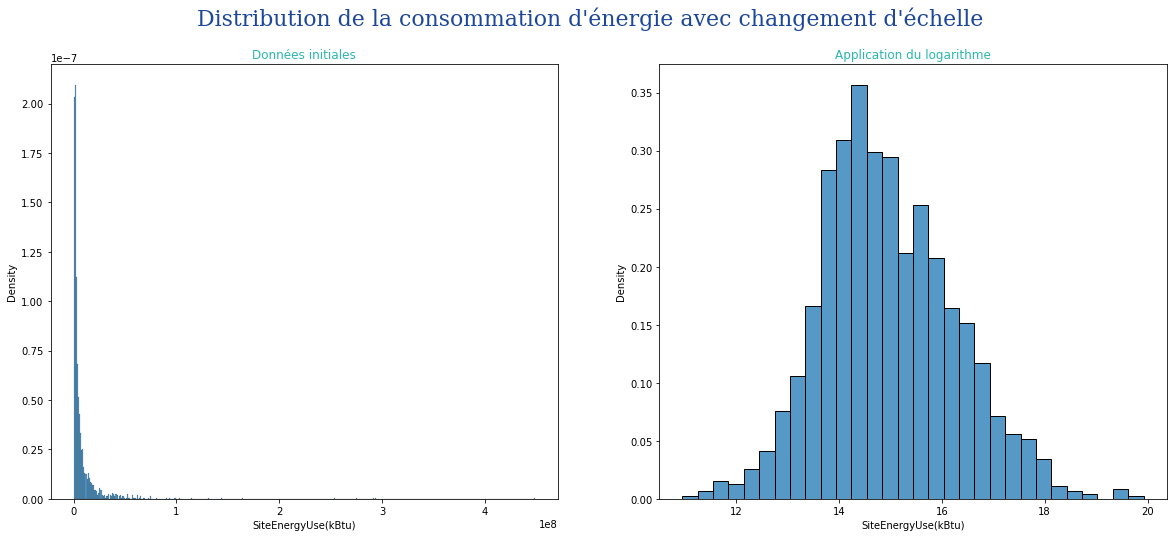

In [22]:
from sklearn.preprocessing import FunctionTransformer

logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_log = logtransformer.transform(Y)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=Y, x='SiteEnergyUse(kBtu)', stat="density", ax=axes[0])
axes[0].set_title("Données initiales", color='#2cb7b0')
sns.histplot(data=Y_log, x='SiteEnergyUse(kBtu)', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme", color='#2cb7b0')
plt.suptitle("Distribution de la consommation d'énergie avec changement d'échelle", fontdict=font_title, fontsize=22)
plt.show()

En passant les données à l'échelle logarithmique, nous obtenons une distribution normale des données à prédire. Nous allons donc appliquer cette transformation dans notre pipeline grâce à la fonction TransformedTargetRegressor de la librairie Sklearn.

La fonction inverse (exp) sera donc passée dans les prédictions.

2. Modèle Baseline :

In [23]:
from sklearn.dummy import DummyRegressor
dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
dummy_pred = dummy_reg.predict(X_test)

In [24]:
def metrics_model(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = y_true - y_pred
    mae = np.mean(abs(diff))
    mse = np.mean(diff**2)
    rmse = np.sqrt(mse)
    r2 = 1-(sum(diff**2)/sum((y_true-np.mean(y_true))**2))
    dict_metrics = {"Métrique":["MAE", "MSE", "RMSE", "R²"], "Résultats":[mae, mse, rmse, r2]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

In [25]:
dummy_metrics = metrics_model(Y_test['SiteEnergyUse(kBtu)'], dummy_pred).rename(columns={'Résultats':'Baseline'})
dummy_metrics

,Métrique,Baseline
0,MAE,9.452627e+06
1,MSE,8.366226e+14
2,RMSE,2.892443e+07
3,R²,-8.019255e-04


Régression linéaire multivariée
A présent, nous allons créer un modèle baseline pour évaluer les performances de nos futurs modèles et vérifier qu'ils améliore les prédictions. Pour cette baseline, nous utiliserons une régression linéaire multivariée.

In [26]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')


param_mlr = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]}

mlr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_mlr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearRegression(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_mlr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

Nous allons calculer 2 principales métriques pour évaluer nos modèles :

MAE : Mean Absolute Error.

R² : Coeficient de détermination, carré du coefiscient de corrélation linéaire.

In [27]:
#Retour des meilleurs scores NMAE et R2
#Stockage du dataframe de resultats du modèle
def model_scores(pip,step):
    df_results = pd.DataFrame.from_dict(pip.named_steps[step].cv_results_) \
                    .sort_values('rank_test_neg_mean_absolute_error')
    best_nmae = pip.named_steps[step].best_score_
    best_r2 = np.mean(df_results[df_results.rank_test_r2 == 1]['mean_test_r2'])
    best_params = pip.named_steps[step].best_params_
    training_time = round((np.mean(df_results.mean_fit_time)*X_train.shape[0]),2)
    print("Meilleur score MAE : {}\nMeilleur Score R2 : {}\nMeilleurs paramètres : {}\nTemps moyen d'entrainement : {}s"\
         .format(round(best_nmae,3), round(best_r2,3), best_params, training_time))
    return df_results

On affiche les scores de la GridSearch avec validation croisée pour la variable 'SiteEnergyUse(kBtu)' :

In [28]:
SEU_mlr_model = mlr_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_mlr_results = model_scores(SEU_mlr_model, 'grid_search_mlr')

Meilleur score MAE : -11263938.077
Meilleur Score R2 : -43.582
Meilleurs paramètres : {'regressor__fit_intercept': False, 'regressor__normalize': True}
Temps moyen d'entrainement : 32.63s


In [29]:
SEU_mlr_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['BuildingType',
                                                   'PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'LargestPropertyUseType']),
                                                 ('numeric', StandardScaler(),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'BuildingAge'])])),
                ('grid_search_mlr',
                 GridSearchCV(cv=5,
                              estimator=TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=LinearRegression()),
                              n_jobs=-1,
                              param_grid={'regressor__fit_intercept': [True,
                                                                       False],
                                          'regressor__normalize': [True,
                                                                   False]},
                              refit='neg_mean_absolute_error',
                              return_train_score=True,
                              scoring=('r2', 'neg_mean_absolute_error')))])

# 3. Modèle linéaires : ElasticNet et SVR

## 3.1. Modèle ElasticNet

In [30]:
from sklearn.linear_model import ElasticNet

param_eNet = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.1)}

eNet_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_enet', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=ElasticNet(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_eNet,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

In [31]:
SEU_eNet_model = eNet_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_eNet_results = model_scores(SEU_eNet_model, 'grid_search_enet')

Meilleur score MAE : -5948750.728
Meilleur Score R2 : 0.14
Meilleurs paramètres : {'regressor__alpha': 1.0, 'regressor__l1_ratio': 0.1, 'regressor__max_iter': 10}
Temps moyen d'entrainement : 68.96s


In [32]:
SEU_eNet_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['BuildingType',
                                                   'PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'LargestPropertyUseType']),
                                                 ('numeric', StandardScaler(),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'BuildingAge'])])),
                ('grid_search_enet',
                 GridSearc...
                              estimator=TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=ElasticNet()),
                              n_jobs=-1,
                              param_grid={'regressor__alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                                          'regressor__l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                          'regressor__max_iter': [10, 100,
                                                                  1000]},
                              refit='neg_mean_absolute_error',
                              return_train_score=True,
                              scoring=('r2', 'neg_mean_absolute_error')))])

## 3.2. Modèle Support Vector Regression (SVR)

In [33]:
from sklearn.svm import LinearSVR

param_svr = {'regressor__C' : np.logspace(-4, 0, 5),
             'regressor__epsilon' : [0, 0.01, 0.1, 0.5, 1, 2],
             'regressor__loss' : ["epsilon_insensitive","squared_epsilon_insensitive"],
             'regressor__max_iter': [10, 100, 1000]}

svr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_svr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearSVR(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_svr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [34]:
SEU_svr_model = svr_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_svr_results = model_scores(SEU_svr_model, 'grid_search_svr')

Meilleur score MAE : -6517118.616
Meilleur Score R2 : 0.012
Meilleurs paramètres : {'regressor__C': 0.01, 'regressor__epsilon': 0.1, 'regressor__loss': 'epsilon_insensitive', 'regressor__max_iter': 100}
Temps moyen d'entrainement : 6.29s


# 4. Modèle non-linéaires : XGBoost et RandomForestRegressor¶
## 4.1. Modèle RandomForestRegressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

param_rfr = {'regressor__max_features' : ['sqrt', 'log2'],
             'regressor__max_depth': [5, 15, 25, 50],
             'regressor__min_samples_split': [2, 5, 10],
             'regressor__bootstrap' : [True, False],
             'regressor__min_samples_leaf': [1,2,5,10]}

rfr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_rfr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=RandomForestRegressor(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_rfr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [36]:
SEU_rfr_model = rfr_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_rfr_results = model_scores(SEU_rfr_model, 'grid_search_rfr')

Meilleur score MAE : -3671217.318
Meilleur Score R2 : 0.654
Meilleurs paramètres : {'regressor__bootstrap': False, 'regressor__max_depth': 25, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}
Temps moyen d'entrainement : 266.04s


## 4.2. Modèle XGBoost *(eXtreme Gradient Boosting)*

In [38]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [39]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param_xgb = {'regressor__learning_rate' : [0.001, 0.01, 0.1, 0.2, 0,3],
             'regressor__gamma': [0, 0.25, 0.5, 1.0],
             'regressor__max_depth': [6, 10, 15, 20],
             'regressor__min_child_weight' : [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
             'regressor__n_estimators': [25, 50, 100, 500, 1000]}

xgb_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_xgb', RandomizedSearchCV(
                            TransformedTargetRegressor(
                                regressor=xgb.XGBRegressor(tree_method='hist'), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_distributions=param_xgb,
                            n_iter=20,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [40]:
SEU_xgb_model = xgb_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_xgb_results = model_scores(SEU_xgb_model, 'grid_search_xgb')

C:\Users\laure\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [        nan  0.69830639  0.62861456 -0.24424573  0.5747346   0.62547546
 -0.24209277 -0.24424578 -0.24203463  0.49723489 -0.24424573  0.62309542
  0.57790392 -0.24424266 -0.24424573  0.56461779  0.58577224 -0.24209071
  0.03791631  0.56509016]
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [        nan  0.90592029  0.84220031 -0.16338435  0.67718855  0.80471212
 -0.16198879 -0.16338438 -0.16195094  0.55778079 -0.16338435  0.99993198
  0.80438715 -0.16338242 -0.16338435  0.70955104  0.71366883 -0.16198743
  0.05063078  0.74453642]
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [              nan -3480418.5805573  -3620454.

Meilleur score MAE : -3480418.581
Meilleur Score R2 : 0.698
Meilleurs paramètres : {'regressor__n_estimators': 1000, 'regressor__min_child_weight': 0.5, 'regressor__max_depth': 6, 'regressor__learning_rate': 0.01, 'regressor__gamma': 0}
Temps moyen d'entrainement : 587.66s


Résultats légèrement meilleurs pour le RandomForest

# 5. Sélection du meilleur modèle

## 5.1 Modèle de prédiction des consommations d'énergie

In [41]:
metrics = ['mean_fit_time', 'mean_score_time',
           'mean_test_neg_mean_absolute_error',
           'mean_train_neg_mean_absolute_error']

SEU_compare_metrics = pd.concat([pd.DataFrame(SEU_rfr_results[metrics].mean(), columns=['RandomForest']),
           pd.DataFrame(SEU_xgb_results[metrics].mean(), columns=['XGBoost']),
           pd.DataFrame(SEU_svr_results[metrics].mean(), columns=['LinearSVR']),
           pd.DataFrame(SEU_eNet_results[metrics].mean(), columns=['ElasticNet']),
           pd.DataFrame(SEU_mlr_results[metrics].mean(), columns=['LinearRegression'])
          ], axis=1)
SEU_final_metrics_compare = pd.DataFrame(columns=metrics, 
                                     index=['RandomForest','XGBoost',
                                            'LinearSVR','ElasticNet',
                                            'LinearRegression'])
for m in metrics:
    SEU_final_metrics_compare[m] = SEU_compare_metrics.loc[m]
SEU_compare_metrics

,RandomForest,XGBoost,LinearSVR,ElasticNet,LinearRegression
mean_fit_time,2.150691e-01,4.750723e-01,5.085240e-03,5.574975e-02,2.637917e-02
mean_score_time,1.297205e-02,9.313288e-03,9.019001e-04,8.621005e-04,1.047075e-03
mean_test_neg_mean_absolute_error,-4.857362e+06,-5.724290e+06,-3.785814e+07,-1.035071e+07,-1.127244e+07
mean_train_neg_mean_absolute_error,-4.309919e+06,-5.038638e+06,-2.978551e+07,-8.551170e+06,-8.513889e+06


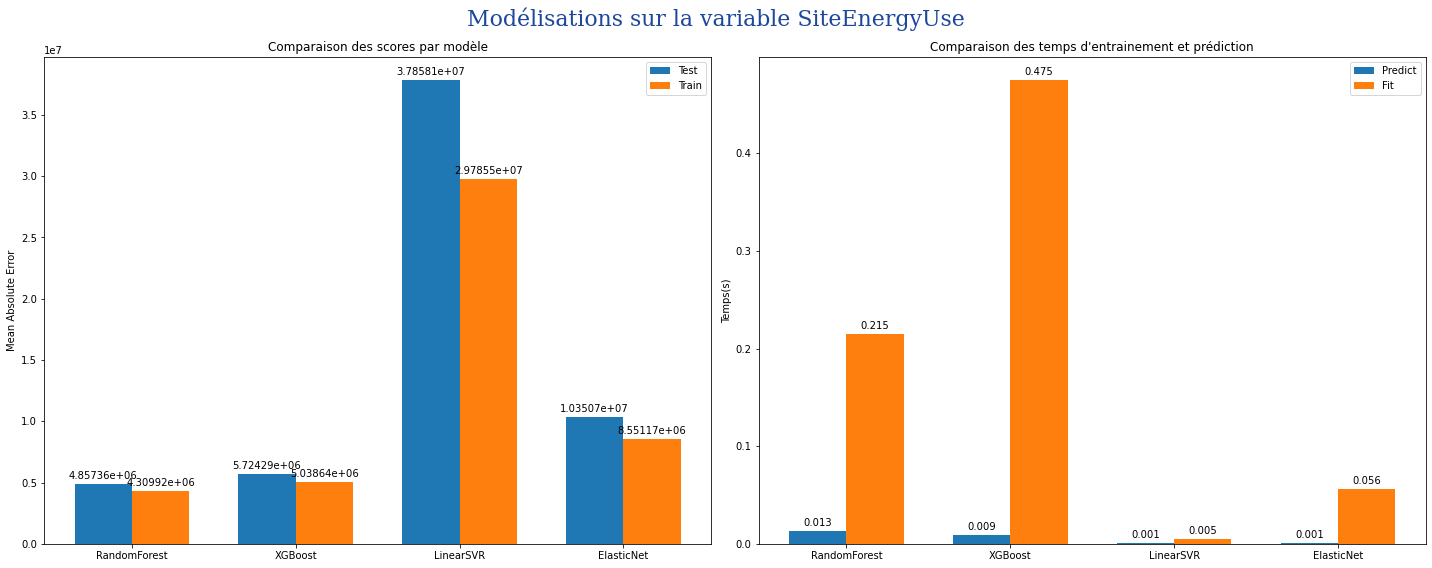

In [42]:
SEU_final_metrics_compare = SEU_final_metrics_compare[SEU_final_metrics_compare.index != 'LinearRegression']
x = np.arange(len(SEU_final_metrics_compare.index))
width = 0.35

fig, ax = plt.subplots(1,2,figsize=(20,8), sharey=False, sharex=False)

scores1 = ax[0].bar(x - width/2, -1*SEU_final_metrics_compare['mean_test_neg_mean_absolute_error'], width, label='Test')
scores2 = ax[0].bar(x + width/2, -1*SEU_final_metrics_compare['mean_train_neg_mean_absolute_error'], width, label='Train')
ax[0].set_ylabel('Mean Absolute Error')
ax[0].set_title('Comparaison des scores par modèle')
ax[0].set_xticks(x)
ax[0].set_xticklabels(SEU_final_metrics_compare.index)
ax[0].legend()
ax[0].bar_label(scores1, padding=3)
ax[0].bar_label(scores2, padding=3)

times1 = ax[1].bar(x - width/2, SEU_final_metrics_compare['mean_score_time'], width, label='Predict')
times2 = ax[1].bar(x + width/2, SEU_final_metrics_compare['mean_fit_time'], width, label='Fit')
ax[1].set_ylabel('Temps(s)')
ax[1].set_title("Comparaison des temps d'entrainement et prédiction")
ax[1].set_xticks(x)
ax[1].set_xticklabels(SEU_final_metrics_compare.index)
ax[1].legend()
ax[1].bar_label(times1, padding=3, fmt='%.3f')
ax[1].bar_label(times2, padding=3, fmt='%.3f')

plt.suptitle("Modélisations sur la variable SiteEnergyUse", fontdict=font_title, fontsize=22)
fig.tight_layout()

plt.show()

Pour la variable SiteEnergyUse, le modèle RandomForest offre le meilleur compromis scores MAE et temps d'entrainement et de prédiction. Nous allons donc séléctionner le modèle RandomForestRegressor pour prédire la variable SiteEnergyUse.

Regardons maintenant l'impact des hyperparamètres de la Grille de recherche :

In [43]:
#Fonction d'affichage des scores de GridSearch pour chacun des paramètres
def plot_search_results(grid, title): 
       
    ## Résultats de la GridSearch
    results = grid.cv_results_
    means_test = results['mean_test_neg_mean_absolute_error']
    stds_test = results['std_test_neg_mean_absolute_error']
    means_train = results['mean_train_neg_mean_absolute_error']
    stds_train = results['std_train_neg_mean_absolute_error']

    ## Index de valeurs par hyper-paramètre
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    
    ## Plot des résultats
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Scores par paramètres pour la variable {}'.format(title), 
                 fontdict=font_title, fontsize=22)
    fig.text(0.04, 0.5, 'NEG MEAN ABSOLUTE ERROR SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test', color="#2cb7b0")
        ax[i].errorbar(x, y_2, e_2, linestyle='--', marker='o', label='train', color="#337da4")
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()
    
    print("\nRappel des meilleurs paramètres :\n{}".format(grid.best_params_))

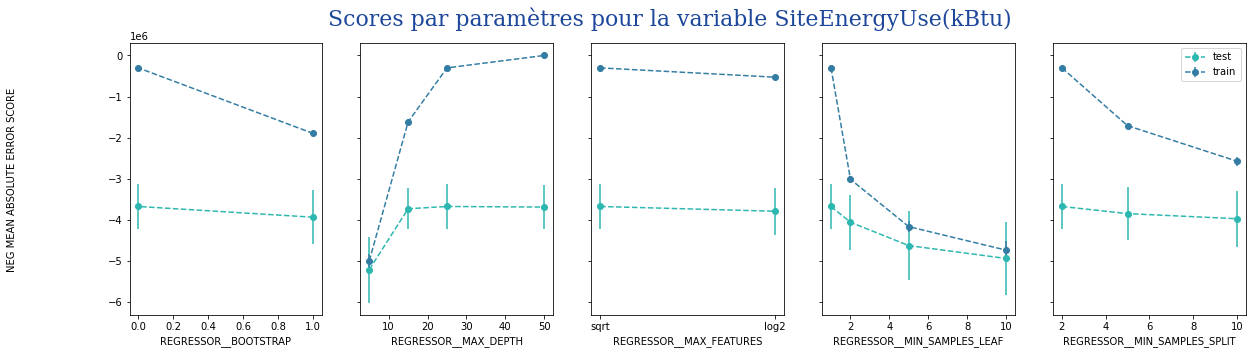


Rappel des meilleurs paramètres :
{'regressor__bootstrap': False, 'regressor__max_depth': 25, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}


In [44]:
plot_search_results(SEU_rfr_model.named_steps['grid_search_rfr'], title="SiteEnergyUse(kBtu)")

 Regardons à présent l'importance des variables dans notre modèle de forêts aléatoires

C:\Users\laure\AppData\Local\Temp/ipykernel_1389196/272616078.py:35: UserWarning: Transformer numeric (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


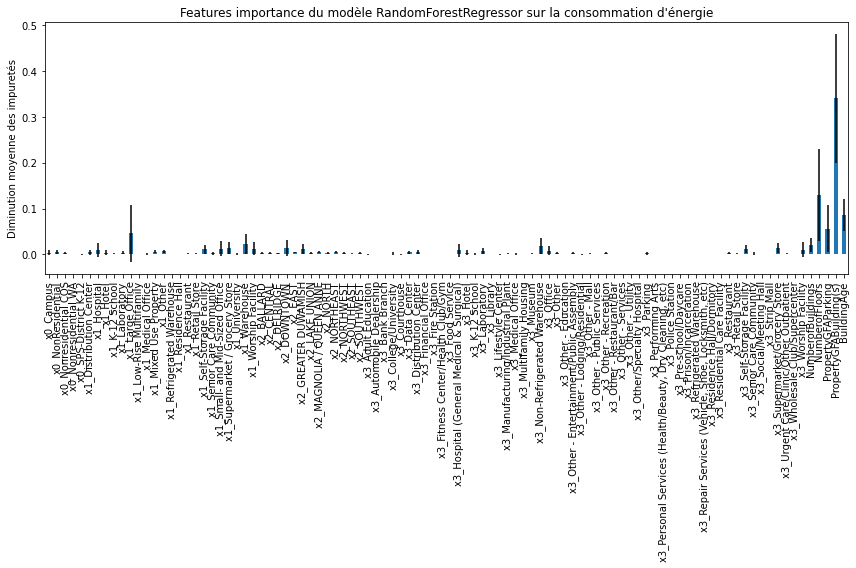

In [45]:
feature_importance = SEU_rfr_model.named_steps['grid_search_rfr'].best_estimator_.regressor_.feature_importances_ 
features_names = get_feature_names(SEU_rfr_model.named_steps['preprocessor'])
std = np.std([
    tree.feature_importances_ for tree in SEU_rfr_model.named_steps['grid_search_rfr'].best_estimator_.regressor_], axis=0)
df_feature_importance = pd.Series(feature_importance, index=features_names)

fig, ax = plt.subplots(figsize=(12,8))
df_feature_importance.plot.bar(yerr=std, ax=ax)
ax.set_title("Features importance du modèle RandomForestRegressor sur la consommation d'énergie")
ax.set_ylabel("Diminution moyenne des impuretés")
fig.tight_layout()

## SHAP

In [46]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [47]:
import shap

print("SHAP Version : {}".format(shap.__version__))

SHAP Version : 0.41.0


In [48]:
shap.initjs()

# 6. Test des modèles sélectionnés
Nous allons à présent tester les modèles sélectionnés sur nos données test et vérifier leurs performances.

In [49]:
def metrics_model(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = y_true - y_pred
    mae = np.mean(abs(diff))
    r2 = 1-(sum(diff**2)/sum((y_true-np.mean(y_true))**2))
    dict_metrics = {"Métrique":["MAE", "R²"], "Résultats":[mae, r2]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

In [50]:
def plot_pred_true(y_true, y_pred, color=None, title=None):
    X_plot = [y_true.min(), y_true.max()]
    fig = plt.figure(figsize=(12,8))
    plt.scatter(y_true, y_pred, color=color, alpha=.6)
    plt.plot(X_plot, X_plot, color='r')
    plt.xlabel("Valeurs réélles")
    plt.ylabel("Valeurs prédites")
    plt.title("Valeurs prédites VS valeurs réélles | Variable {}".format(title), 
              fontdict=font_title, fontsize=18)
    plt.show()

In [51]:
start_time = time.time()

SEU_pred = SEU_rfr_model.predict(X_test)

print("Temps d'execution de l'algorithme : {:.2} s.".format((time.time() - start_time)))

Temps d'execution de l'algorithme : 0.027 s.


In [52]:
#Calcul des métriques pour la consommation d'énergie
SEUmetrics = metrics_model(Y_test['SiteEnergyUse(kBtu)'],SEU_pred)
SEUmetrics

,Métrique,Résultats
0,MAE,5.230627e+06
1,R²,1.223460e-01


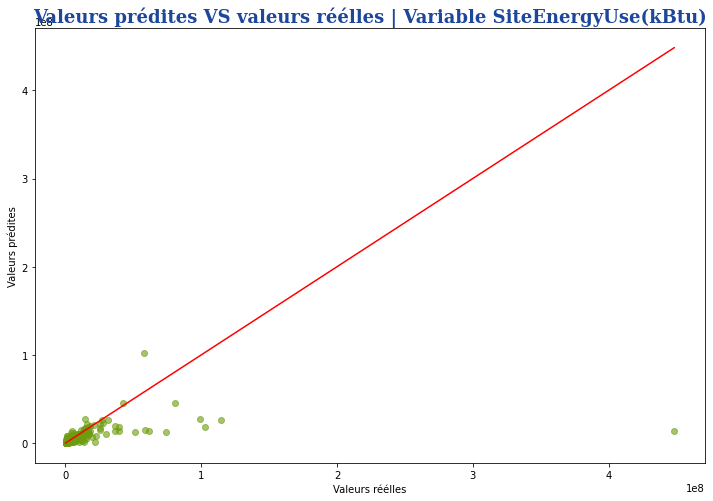

In [53]:
#Affichage des valeurs prédites vs valeurs réélles pour la consommation d'énergie
plot_pred_true(Y_test['SiteEnergyUse(kBtu)'],SEU_pred, color="#6D9C0E", title="SiteEnergyUse(kBtu)")

In [54]:
final_SEU_test = pd.concat([X_test,Y_test],axis=1)
final_SEU_test['SEU_pred'] = SEU_pred
compare_final_SEU_test = final_SEU_test = final_SEU_test.groupby(by='BuildingType').mean()

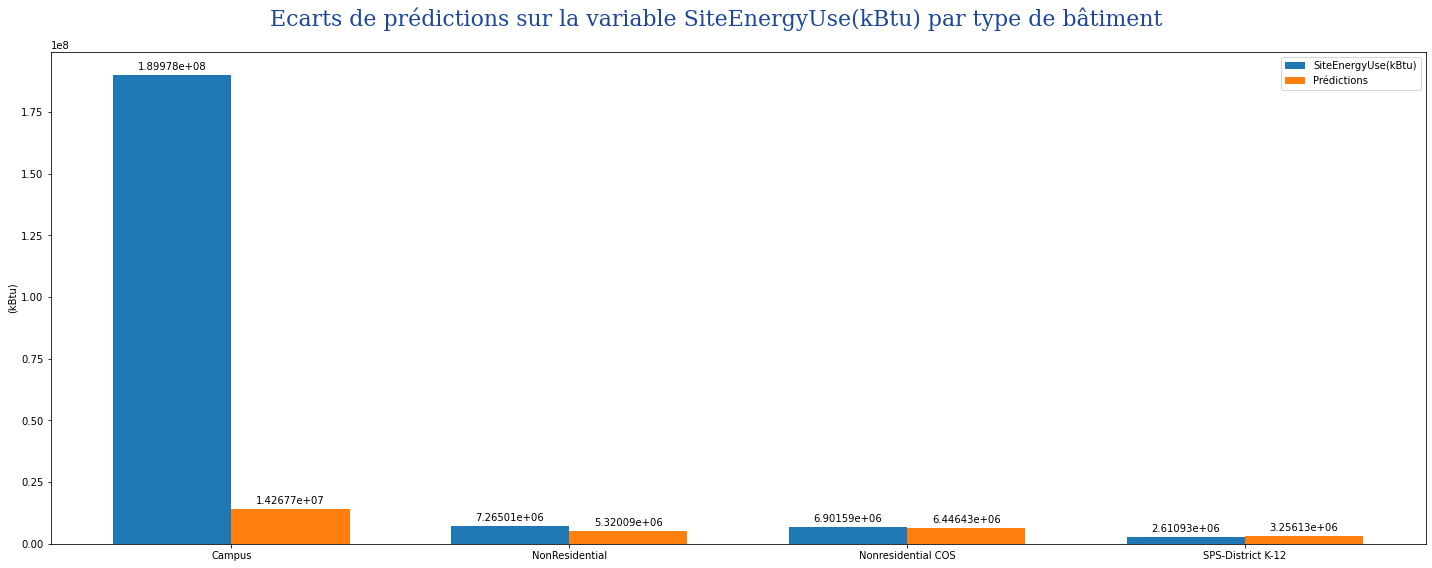

In [55]:
x = np.arange(len(compare_final_SEU_test.index))
width = 0.35

fig, ax = plt.subplots(figsize=(20,8), sharey=False, sharex=False)

scores1 = ax.bar(x - width/2, compare_final_SEU_test['SiteEnergyUse(kBtu)'], width, label='SiteEnergyUse(kBtu)')
scores2 = ax.bar(x + width/2, compare_final_SEU_test['SEU_pred'], width, label='Prédictions')
ax.set_ylabel('(kBtu)')
ax.set_xticks(x)
ax.set_xticklabels(compare_final_SEU_test.index)
ax.legend()
ax.bar_label(scores1, padding=3)
ax.bar_label(scores2, padding=3)

plt.suptitle("Ecarts de prédictions sur la variable SiteEnergyUse(kBtu) par type de bâtiment", fontdict=font_title, fontsize=22)
fig.tight_layout()

plt.show()


L'écart est très important sur la catégorie "Campus" qui est faiblement représentée dans le jeu de données mais qui présente les plus grandes consommations.

# 7. Influence du score ENERGY STAR

In [56]:
#Ajout de la variable à nos variables X
X['energystar_score'] = energystar_score
#Ajout de la variable dans les variables numérique du preprocessor
numeric_features.append('energystar_score')

In [57]:
#Filtrage des données ayant un Energy Star Score renseigné
X = X[X['energystar_score'].isnull()==False]
Y = Y[Y.index.isin(list(X.index))]

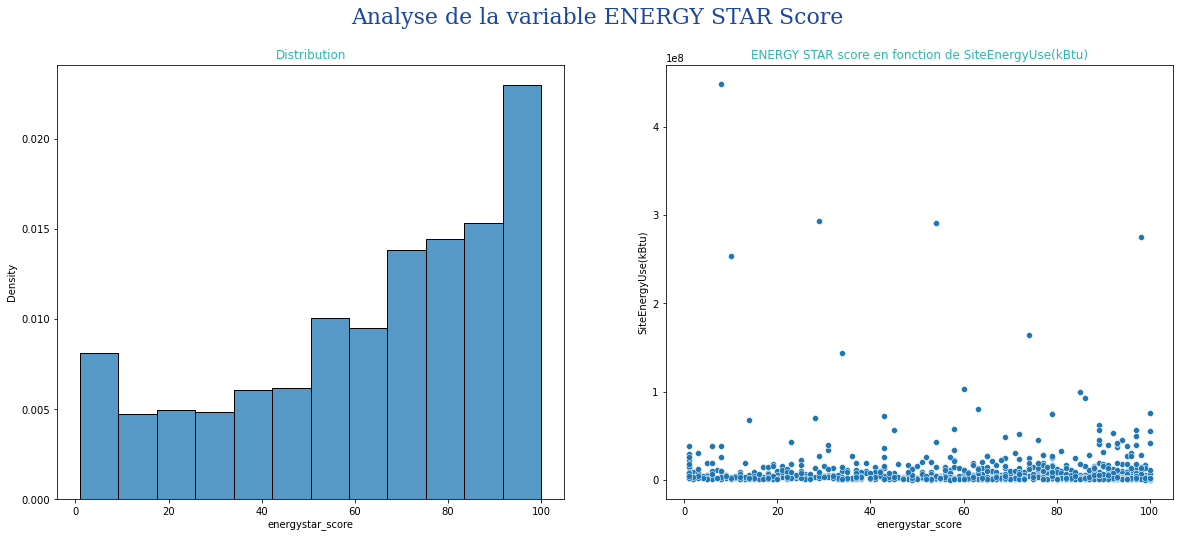

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=X, x='energystar_score', stat="density", ax=axes[0])
axes[0].set_title("Distribution", color='#2cb7b0')
sns.scatterplot(data=pd.concat([X,Y], axis=1), y='SiteEnergyUse(kBtu)', x='energystar_score', ax=axes[1])
axes[1].set_title("ENERGY STAR score en fonction de SiteEnergyUse(kBtu)", color='#2cb7b0')
plt.suptitle("Analyse de la variable ENERGY STAR Score", fontdict=font_title, fontsize=22)
plt.show()

On remarque ici que le score ENERGY STAR ne semble pas avoir de corrélation importante avec la consommation d'énergie. La distribution ne suit pas de loi normale et la majorité des batiments a un score supérieur à 50 (de bonne qualité voir de très bonne qualité).

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 797 lignes,
Test: 200 lignes.



On utilise ici le meilleur modèle calculé sur la variable SiteEnergyUse(kBtu) en incluant l'ENERGY STAR Score :

In [60]:
rfr_grid_cv_eStar = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_rfr_eStar', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=RandomForestRegressor(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_rfr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

SEU_rfr_model_eStar = rfr_grid_cv_eStar.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_rfr_results_eStar = model_scores(SEU_rfr_model_eStar, 'grid_search_rfr_eStar')

Meilleur score MAE : -3418024.3
Meilleur Score R2 : 0.64
Meilleurs paramètres : {'regressor__bootstrap': False, 'regressor__max_depth': 50, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}
Temps moyen d'entrainement : 157.32s


In [61]:
SEU_pred_star = SEU_rfr_model_eStar.predict(X_test)
#Calcul des métriques pour la consommation d'énergie
SEUmetricsES = metrics_model(Y_test['SiteEnergyUse(kBtu)'],SEU_pred_star)
SEUmetrics = SEUmetrics.rename(columns={"Résultats" : "Sans ENERGY STAR"})
SEUmetrics['Avec ENERGY STAR'] = SEUmetricsES['Résultats']
SEUmetrics

,Métrique,Sans ENERGY STAR,Avec ENERGY STAR
0,MAE,5.230627e+06,4.452642e+06
1,R²,1.223460e-01,3.755102e-01


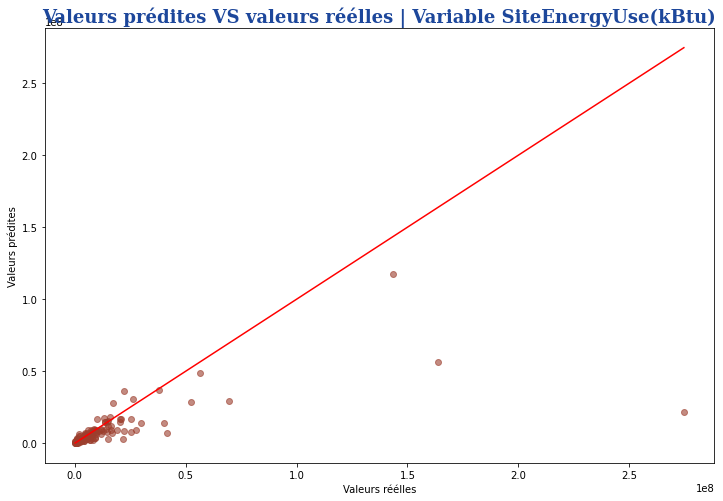

In [62]:
#Affichage des valeurs prédites vs valeurs réélles pour émissions de CO2
plot_pred_true(Y_test['SiteEnergyUse(kBtu)'],SEU_pred_star, color="#9C3E2D", title="SiteEnergyUse(kBtu)")

Pour le coût de collecte, l'amélioration n'apparaît pas comme significative

In [63]:
df = pd.read_csv("building-energy-cleaned.csv")

In [64]:
df = df.drop(['TotalGHGEmissions', 'ENERGYSTARScore'], axis=1)

In [65]:
df = df[df['SiteEnergyUse(kBtu)']<8*10**8]

In [66]:
identification_features = ['OSEBuildingID']
df_identification = df[identification_features]
df.drop(identification_features, axis=1, inplace = True)

In [67]:
df

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,SiteEnergyUse(kBtu),BuildingAge
0,NonResidential,Hotel,DOWNTOWN,1.0,12,0,88434,Hotel,7.226362e+06,89
1,NonResidential,Hotel,DOWNTOWN,1.0,11,15064,88502,Hotel,8.387933e+06,20
2,NonResidential,Hotel,DOWNTOWN,1.0,41,196718,759392,Hotel,7.258702e+07,47
3,NonResidential,Hotel,DOWNTOWN,1.0,10,0,61320,Hotel,6.794584e+06,90
4,NonResidential,Hotel,DOWNTOWN,1.0,18,62000,113580,Hotel,1.417261e+07,36
...,...,...,...,...,...,...,...,...,...,...
1543,Nonresidential COS,Other,DELRIDGE,1.0,1,0,18261,Other - Recreation,9.320821e+05,34
1544,Nonresidential COS,Other,DOWNTOWN,1.0,1,0,16000,Other - Recreation,9.502762e+05,12
1545,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1.0,1,0,13157,Other - Recreation,5.765898e+06,42
1546,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1.0,1,0,14101,Other - Recreation,7.194712e+05,27


In [68]:
df.iloc[1509]

BuildingType                  NonResidential
PrimaryPropertyType                    Other
Neighborhood                       SOUTHEAST
NumberofBuildings                        1.0
NumberofFloors                             1
PropertyGFAParking                         0
PropertyGFABuilding(s)                 40265
LargestPropertyUseType    Pre-school/Daycare
SiteEnergyUse(kBtu)               2159170.25
BuildingAge                                7
Name: 1509, dtype: object

In [69]:
ligne_na = df.loc[df.isna().any(axis=1)]

In [70]:
ligne_na

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,SiteEnergyUse(kBtu),BuildingAge


In [71]:
df_cat = df[['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType']]

In [72]:
# Compute counts for each categorical feature's levels
category_counts=list(map(lambda col: df[col].value_counts(), df_cat.columns))
for category in category_counts:
    print(category, "\n")

NonResidential        1432
Nonresidential COS      81
Campus                  23
SPS-District K-12       10
Nonresidential WA        1
Name: BuildingType, dtype: int64 

Small- and Mid-Sized Office    286
Other                          245
Warehouse                      185
Large Office                   169
Mixed Use Property             113
Retail Store                    85
Hotel                           75
Worship Facility                69
Distribution Center             53
K-12 School                     50
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      23
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64 

DOWNTOWN                 351
GREATER DUWAMISH        

In [73]:
# OHE

from sklearn.preprocessing import OneHotEncoder
# Drop one level for each categorical variable to avoid multicollinearity
enc = OneHotEncoder(sparse=False).fit(df_cat)
col_names = enc.get_feature_names(df_cat.columns)
df_cat_ohe = pd.DataFrame(enc.transform(df_cat), columns=col_names)
df_ohe=pd.concat([df_cat_ohe, df[['NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'BuildingAge', 'SiteEnergyUse(kBtu)']]], axis = 1)

In [74]:
df_ohe

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),BuildingAge,SiteEnergyUse(kBtu)
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,12.0,0.0,88434.0,89.0,7.226362e+06
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,11.0,15064.0,88502.0,20.0,8.387933e+06
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,41.0,196718.0,759392.0,47.0,7.258702e+07
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,10.0,0.0,61320.0,90.0,6.794584e+06
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,18.0,62000.0,113580.0,36.0,1.417261e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,18261.0,34.0,9.320821e+05
1544,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,16000.0,12.0,9.502762e+05
1545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,13157.0,42.0,5.765898e+06
1546,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,14101.0,27.0,7.194712e+05


In [75]:
df_ohe.isna().sum().max()

1

In [76]:
df_ohe.drop(df.tail(1).index, 
        inplace = True)

In [77]:
df_ohe

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),BuildingAge,SiteEnergyUse(kBtu)
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,12.0,0.0,88434.0,89.0,7.226362e+06
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,11.0,15064.0,88502.0,20.0,8.387933e+06
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,41.0,196718.0,759392.0,47.0,7.258702e+07
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,10.0,0.0,61320.0,90.0,6.794584e+06
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,18.0,62000.0,113580.0,36.0,1.417261e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,20050.0,22.0,1.813404e+06
1543,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,18261.0,34.0,9.320821e+05
1544,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,16000.0,12.0,9.502762e+05
1545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,13157.0,42.0,5.765898e+06


In [78]:
df_ohe.isna().sum()

BuildingType_Campus                0
BuildingType_NonResidential        0
BuildingType_Nonresidential COS    0
BuildingType_Nonresidential WA     0
BuildingType_SPS-District K-12     0
                                  ..
NumberofFloors                     1
PropertyGFAParking                 1
PropertyGFABuilding(s)             1
BuildingAge                        1
SiteEnergyUse(kBtu)                1
Length: 100, dtype: int64

In [79]:
ligne_na = df_ohe.loc[df_ohe.isna().any(axis=1)]

In [80]:
ligne_na

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),BuildingAge,SiteEnergyUse(kBtu)
1510,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df_ohe.dropna(axis=0, how='any', inplace=True)

In [82]:
df_ohe.isna().sum().max()

0

In [83]:
# Train-test splitting
from sklearn.model_selection import train_test_split

x, y = df_ohe.drop(columns='SiteEnergyUse(kBtu)'), df_ohe['SiteEnergyUse(kBtu)']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [85]:
# Determine a suitable set of hyperparameters for a Random Forest model using grid searching

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_parameters = {
    'n_estimators': [100],
    'min_samples_split': [2, 10, 50],
    'max_features': list(range(1,len(x_train.columns)+1))
}

rf_gridsearch = GridSearchCV(
    estimator = RandomForestRegressor(random_state=42),
    param_grid=rf_parameters,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1,
    error_score='raise'
)

In [86]:
rf_gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 297 candidates, totalling 1485 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'min_samples_split': [2, 10, 50],
                         'n_estimators': [100]},
             scoring='neg_mean_squared_error', verbose=1)

In [87]:
rf_gridsearch.best_estimator_

RandomForestRegressor(max_features=46, random_state=42)

In [88]:
print("SHAP Version : {}".format(shap.__version__))

SHAP Version : 0.41.0


In [89]:
# Generate the Tree SHAP estimator of Shapley values that corresponds to the Random Forest we built
explainer = shap.TreeExplainer(rf_gridsearch.best_estimator_, feature_perturbation='interventional')
# Compute the estimated Shapley values for the test sample's observations
shap_values = explainer.shap_values(x_test)

In [90]:
# Visualize a few observations: input features, real amount of billed charges and predictions
df_test=pd.concat([x_test, y_test], axis=1).reset_index().drop(columns='index')
df_test['SiteEnergyUse(kBtu)_pred']=list(map(lambda x: round(x,2), rf_gridsearch.best_estimator_.predict(x_test)))
df_test['SiteEnergyUse(kBtu)']=list(map(lambda x: round(x,2), df_test['SiteEnergyUse(kBtu)']))
df_test[:10]

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),BuildingAge,SiteEnergyUse(kBtu),SiteEnergyUse(kBtu)_pred
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.0,239252.0,65773.0,3.0,25959642.00,11292936.30
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,4.0,0.0,73320.0,114.0,1141189.75,3953392.64
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,0.0,35202.0,37.0,3605755.50,2130597.72
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,115668.0,64.0,3534690.75,2984791.41
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,7056.0,21329.0,30.0,2654316.00,1393887.46
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,0.0,20411.0,104.0,2014475.88,806992.83
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,12.0,166208.0,317189.0,1.0,13998638.00,21384022.74
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,156000.0,41395.0,27.0,2737534.50,8046401.80
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,51050.0,75.0,1206165.75,1905388.04
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,20747.0,81.0,1001964.00,737765.01


In [91]:
f'Baseline of the Shapley values: kBtu{round(np.mean(rf_gridsearch.best_estimator_.predict(x_train)))}'

'Baseline of the Shapley values: kBtu8002138'

In [92]:
# Compute individual explanations
observation=20
shap.force_plot(explainer.expected_value, shap_values[observation,:], x_test.iloc[observation,:])

In [93]:
# Compute individual explanations
observation=2
shap.force_plot(explainer.expected_value, shap_values[observation,:], x_test.iloc[observation,:])

In [94]:
# Show the worst predictions
df_test['gap']=df_test['SiteEnergyUse(kBtu)']-df_test['SiteEnergyUse(kBtu)_pred']
df_test.sort_values(by='gap').tail()

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),BuildingAge,SiteEnergyUse(kBtu),SiteEnergyUse(kBtu)_pred,gap
248,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14.0,2.0,0.0,537000.0,71.0,90609640.0,53896507.52,3.671313e+07
104,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,6.0,0.0,203030.0,18.0,51168308.0,10843184.74,4.032512e+07
285,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,8.0,0.0,158738.0,41.0,61762380.0,11566942.62,5.019544e+07
79,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,0.0,591981.0,52.0,102673696.0,39528758.82,6.314494e+07
14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,0.0,494835.0,24.0,448385312.0,32844394.26,4.155409e+08


In [95]:
# Compute individual explanations
observation=14
shap.force_plot(explainer.expected_value, shap_values[observation,:], x_test.iloc[observation,:])

In [96]:
pd.options.display.max_rows = None #pour afficher l'intégralité des lignes (sinon limite par défaut)
display(df_test.iloc[79])

BuildingType_Campus                                                            0.000000e+00
BuildingType_NonResidential                                                    1.000000e+00
BuildingType_Nonresidential COS                                                0.000000e+00
BuildingType_Nonresidential WA                                                 0.000000e+00
BuildingType_SPS-District K-12                                                 0.000000e+00
PrimaryPropertyType_Distribution Center                                        0.000000e+00
PrimaryPropertyType_Hospital                                                   0.000000e+00
PrimaryPropertyType_Hotel                                                      0.000000e+00
PrimaryPropertyType_K-12 School                                                0.000000e+00
PrimaryPropertyType_Laboratory                                                 0.000000e+00
PrimaryPropertyType_Large Office                                               0

In [97]:
# Compute individual explanations
observation=79
shap.force_plot(explainer.expected_value, shap_values[observation,:], x_test.iloc[observation,:])

In [1]:
shap.summary_plot(shap_values, x_test)

NameError: name 'shap' is not defined

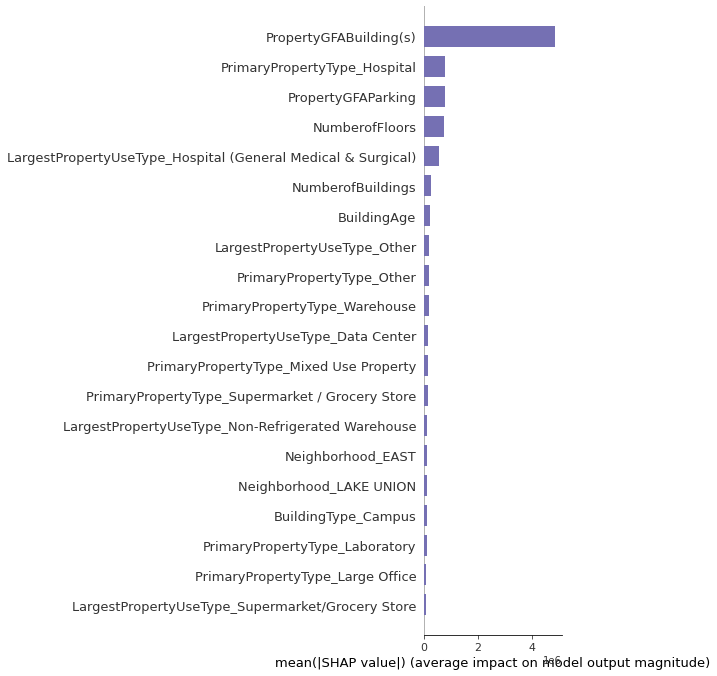

In [98]:
# SHAP feature importance
cmap = plt.get_cmap("Dark2")
shap.summary_plot(shap_values, x_test, plot_type="bar", color=cmap.colors[2])

In [99]:
# Display stacked Shapley values along clustered observations
shap.force_plot(explainer.expected_value, shap_values, x_test)